In [4]:
!pip3 install psycopg2

In [6]:
# Dependencies and Setup
from matplotlib import pyplot as plt 
import pandas as pd
import numpy as np
#from password import password
from scipy import stats
import os
import psycopg2 as pg2

In [26]:
# import data set to df
df = pd.read_csv('database.csv')
df.head()

C:\Users\sandy\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [27]:
# drop unneeded columns
df = df.drop(columns=['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'Record ID', 'Victim Count', 'Perpetrator Count', 'Record Source'])
df.head()

,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon
0,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object
1,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
2,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown
3,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
4,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown


In [30]:
State_year_count= df.groupby(['State', 'Year']).agg({'Year':['count']})
State_year_count.reset_index(inplace = True)
State_year_count.head()

State  Year      
                 count
0  Alabama  1980   513
1  Alabama  1981   453
2  Alabama  1982   424
3  Alabama  1983   372
4  Alabama  1984   382

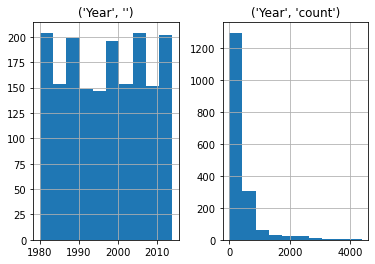

In [37]:
hist = State_year_count.hist()

In [43]:
state_df = df.groupby(['State'])
state_df.head()

,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon
0,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object
1,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
2,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown
3,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
4,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23058,Albany,Wyoming,1980,February,1,Murder or Manslaughter,Yes,Male,22,White,Not Hispanic,Male,19,White,Not Hispanic,Acquaintance,Rifle
23059,Campbell,Wyoming,1980,August,1,Murder or Manslaughter,Yes,Male,27,White,Unknown,Male,39,Black,Unknown,Acquaintance,Shotgun
23060,Carbon,Wyoming,1980,April,1,Murder or Manslaughter,Yes,Male,55,White,Not Hispanic,Male,31,White,Not Hispanic,Acquaintance,Blunt Object
23061,Carbon,Wyoming,1980,August,1,Murder or Manslaughter,Yes,Male,30,White,Unknown,Male,38,White,Unknown,Acquaintance,Rifle


In [44]:
# import data set to df
data_file = "universities_ranking.xlsx"
education_df = pd.read_excel(data_file, engine='openpyxl')
education_df.head()

,University Name,IPEDS ID,State,2021,2020,2019,2018,2017,2016,2015,...,1995,1994,1993,1992,1991,1990,1989,1988,1986,1984
0,Princeton University,186131,New Jersey,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,4.0
1,Harvard University,166027,Massachusetts,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,3.0,4.0,2.0,2.0,2.0
2,Columbia University,190150,New York,3.0,3.0,3.0,5.0,5.0,4.0,4.0,...,9.0,11.0,10.0,9.0,10.0,11.0,8.0,18.0,NaN,NaN
3,Massachusetts Institute of Technology,166683,Massachusetts,4.0,3.0,3.0,5.0,7.0,7.0,7.0,...,4.0,4.0,5.0,6.0,6.0,7.0,5.0,11.0,11.0,10.0
4,Yale University,130794,Connecticut,4.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,2.0,3.0,1.0,1.0,3.0,2.0,3.0


In [51]:
Ed_state_df =education_df.groupby(['State'])
Ed_state_df.head()

,University Name,IPEDS ID,State,2021,2020,2019,2018,2017,2016,2015,...,1995,1994,1993,1992,1991,1990,1989,1988,1986,1984
0,Princeton University,186131,New Jersey,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,4.0
1,Harvard University,166027,Massachusetts,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,3.0,4.0,2.0,2.0,2.0
2,Columbia University,190150,New York,3.0,3.0,3.0,5.0,5.0,4.0,4.0,...,9.0,11.0,10.0,9.0,10.0,11.0,8.0,18.0,NaN,NaN
3,Massachusetts Institute of Technology,166683,Massachusetts,4.0,3.0,3.0,5.0,7.0,7.0,7.0,...,4.0,4.0,5.0,6.0,6.0,7.0,5.0,11.0,11.0,10.0
4,Yale University,130794,Connecticut,4.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,2.0,3.0,1.0,1.0,3.0,2.0,3.0
5,University of Chicago,144050,Illinois,6.0,6.0,3.0,3.0,3.0,4.0,4.0,...,10.0,9.0,9.0,10.0,11.0,9.0,10.0,8.0,5.0,6.0
6,Stanford University,243744,California,6.0,6.0,7.0,5.0,5.0,4.0,4.0,...,5.0,6.0,4.0,3.0,2.0,6.0,6.0,1.0,1.0,1.0
7,University of Pennsylvania,215062,Pennsylvania,8.0,6.0,8.0,8.0,8.0,9.0,8.0,...,12.0,16.0,14.0,13.0,13.0,20.0,15.0,19.0,NaN,NaN
8,Johns Hopkins University,162928,Maryland,9.0,10.0,10.0,11.0,10.0,10.0,12.0,...,22.0,15.0,15.0,11.0,15.0,14.0,11.0,16.0,NaN,NaN
9,Northwestern University,147767,Illinois,9.0,9.0,10.0,11.0,12.0,12.0,13.0,...,14.0,13.0,13.0,14.0,23.0,19.0,16.0,17.0,NaN,NaN


In [46]:
# Combine the data into a single dataset
merge_data_df = pd.merge(state_df, education_df, on="state")
merge_data_df.head()

TypeError: Can only merge Series or DataFrame objects, a <class 'pandas.core.groupby.generic.DataFrameGroupBy'> was passed

In [47]:
#year_df = df.groupby(['Year'])
#year_df.head()

In [48]:
#base_info= df(['State', 'Year', 'Crime Type', 'Victime Ethnicity', 'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race', 'Perpetrator Ethnicity', 'Relationship', 'Weapon')
#base_info

SyntaxError: invalid syntax (<ipython-input-48-f4e7d5c79d27>, line 1)

In [7]:
from sqlalchemy import create_engine

In [9]:
#create connection with PostgreSQL
conn = pg2.connect(database='Homicede_project', user='postgres',password= password)
#Establish connection and start cursor to be ready to query
cur = conn.cursor()
#pass in a query as a string
cur.execute('SELECT * FROM salaries')

SyntaxError: invalid syntax (<ipython-input-9-d4070d592e3a>, line 2)

In [ ]:
# Return first row
cur.fetchone()
# create salary range df
homicides = pd.read_sql('SELECT * FROM Homicede', conn)
# check df
homicides.head()

In [ ]:
hist = homicides.hist()

In [ ]:
#create connection with PostgreSQL
conn1 = pg2.connect(database='Homicide', user='postgres',password= password)
#Establish connection and start cursor to be ready to query
cur1 = conn1.cursor()
#pass in a query as a string
cur1.execute('SELECT * FROM homicide_dates')